## Graph Social Media Hours vs. Age Group

In [1]:
# Import dependencies and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

In [3]:
# Read in smmh.csv from Resources folder as a pandas dataframe
survey_df = pd.read_csv("../Resources/smmh.csv")

survey_df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [3]:
# Rename column headers to make referencing the dataframe easier
survey_df = survey_df.rename(columns={"1. What is your age?":"Age", "2. Gender":"Gender", "3. Relationship Status":"Relationship status",
                                          "4. Occupation Status":"Occupation", "5. What type of organizations are you affiliated with?":"Affiliated organizations",
                                          "6. Do you use social media?":"Social media use", "7. What social media platforms do you commonly use?":"Platforms",
                                          "8. What is the average time you spend on social media every day?":"Hours per day",
                                          "9. How often do you find yourself using Social media without a specific purpose?":"Frequency social media use w/o purpose",
                                          "10. How often do you get distracted by Social media when you are busy doing something?":"Frequency distracted by social media",
                                          "11. Do you feel restless if you haven't used Social media in a while?":"Restless w/o social media",
                                          "12. On a scale of 1 to 5, how easily distracted are you?":"Distracted easily",
                                          "13. On a scale of 1 to 5, how much are you bothered by worries?":"Level worriedness",
                                          "14. Do you find it difficult to concentrate on things?":"Difficulty Concentrating",
                                          "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?":"Frequency comparisons to others social media",
                                          "16. Following the previous question, how do you feel about these comparisons, generally speaking?":"Feelings about comparisons",
                                          "17. How often do you look to seek validation from features of social media?":"Frequency seeking validation from social media",
                                          "18. How often do you feel depressed or down?":"Frequency of depressed feelings",
                                          "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?":"Fluctuation of interest daily activities",
                                          "20. On a scale of 1 to 5, how often do you face issues regarding sleep?":"Issues sleeping"})

survey_df = survey_df.drop(columns="Timestamp")

survey_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,Restless w/o social media,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [4]:
# Check dataframe for null values
survey_df.isnull().sum()

Age                                                0
Gender                                             0
Relationship status                                0
Occupation                                         0
Affiliated organizations                          30
Social media use                                   0
Platforms                                          0
Hours per day                                      0
Frequency social media use w/o purpose             0
Frequency distracted by social media               0
Restless w/o social media                          0
Distracted easily                                  0
Level worriedness                                  0
Difficulty Concentrating                           0
Frequency comparisons to others social media       0
Feelings about comparisons                         0
Frequency seeking validation from social media     0
Frequency of depressed feelings                    0
Fluctuation of interest daily activities      

In [5]:
# Check columns with null values for total value counts
survey_df['Affiliated organizations'].value_counts()

Affiliated organizations
University                        239
Private                            60
School                             44
Company                            30
University, Company                19
University, Private                16
School, University                  9
Company, Private                    7
Goverment                           6
University, Company, Private        5
School, University, Private         4
University, N/A                     3
University, Goverment               2
School, Company                     2
School, N/A                         2
University, Company, Goverment      1
School, Private                     1
University, Goverment, Private      1
Name: count, dtype: int64

In [6]:
# Rename inputs to get rid of N/As and duplicates
survey_df.loc[survey_df["Affiliated organizations"] == "Goverment", "Affiliated organizations"] = "Government"
survey_df.loc[survey_df["Affiliated organizations"] == "University, Goverment, Private", "Affiliated organizations"] = "University, Government, Private"
survey_df.loc[survey_df["Affiliated organizations"] == "University, Goverment", "Affiliated organizations"] = "University, Government"
survey_df.loc[survey_df["Affiliated organizations"] == "University, Company, Goverment", "Affiliated organizations"] = "University, Company, Government"
survey_df.loc[survey_df["Affiliated organizations"] == "University, N/A", "Affiliated organizations"] = "University"
survey_df.loc[survey_df["Affiliated organizations"] == "School, N/A", "Affiliated organizations"] = "School"

survey_df["Affiliated organizations"].value_counts()

Affiliated organizations
University                         242
Private                             60
School                              46
Company                             30
University, Company                 19
University, Private                 16
School, University                   9
Company, Private                     7
Government                           6
University, Company, Private         5
School, University, Private          4
University, Government               2
School, Company                      2
School, Private                      1
University, Government, Private      1
University, Company, Government      1
Name: count, dtype: int64

In [7]:
# Rename inputs to get rid of mispelled duplicates
survey_df.loc[survey_df["Gender"] == "Nonbinary ", "Gender"] = "Non-binary"
survey_df.loc[survey_df["Gender"] == "NB", "Gender"] = "Non-binary"
survey_df.loc[survey_df["Gender"] == "Non binary ", "Gender"] = "Non-binary"
survey_df.loc[survey_df["Gender"] == "unsure ", "Gender"] = "Unsure"
survey_df.loc[survey_df["Gender"] == "There are others???", "Gender"] = "Other"

survey_df["Gender"].value_counts()

Gender
Female        263
Male          211
Non-binary      4
Unsure          1
Trans           1
Other           1
Name: count, dtype: int64

In [8]:
# Create a list of indexes where null values appear and iterate through those indexes to replace null values with appropriate affiliated organization based on listed occupation
nan_rows = survey_df.isna()

nan_list = list(np.where(nan_rows["Affiliated organizations"])[0])

for index in nan_list:
    if survey_df.loc[index, "Occupation"] == "School Student":
        survey_df.loc[index, "Affiliated organizations"] = "School"
        
    elif survey_df.loc[index, "Occupation"] == "University Student":
        survey_df.loc[index, "Affiliated organizations"] = "University"
        
    elif survey_df.loc([index, "Occupation"] == "Retired") or ([index, "Occupation"] == "Salaried Worker"):
        survey_df.loc[index, "Affiliated organizations"] = "No Answer Given"

In [9]:
# double check for null values to confirm they have all been replaced
survey_df.isnull().sum()

Age                                               0
Gender                                            0
Relationship status                               0
Occupation                                        0
Affiliated organizations                          0
Social media use                                  0
Platforms                                         0
Hours per day                                     0
Frequency social media use w/o purpose            0
Frequency distracted by social media              0
Restless w/o social media                         0
Distracted easily                                 0
Level worriedness                                 0
Difficulty Concentrating                          0
Frequency comparisons to others social media      0
Feelings about comparisons                        0
Frequency seeking validation from social media    0
Frequency of depressed feelings                   0
Fluctuation of interest daily activities          0
Issues sleep

In [10]:
# Display all columns for column renaming purposes
pd.set_option('display.max_columns', None)

# Change Hours per day responses to integers in string format for sorting purposes
survey_df.loc[survey_df["Hours per day"] == "Less than an Hour", "Hours per day"] = "0-1"
survey_df.loc[survey_df["Hours per day"] == "Between 1 and 2 hours", "Hours per day"] = "1-2"
survey_df.loc[survey_df["Hours per day"] == "Between 2 and 3 hours", "Hours per day"] = "2-3"    
survey_df.loc[survey_df["Hours per day"] == "Between 3 and 4 hours", "Hours per day"] = "3-4"
survey_df.loc[survey_df["Hours per day"] == "Between 4 and 5 hours", "Hours per day"] = "4-5"
survey_df.loc[survey_df["Hours per day"] == "More than 5 hours", "Hours per day"] = "5+"

# Create a column for total score of all questionaire results
survey_df["Total score"] = survey_df.loc[:, ["Frequency social media use w/o purpose", "Frequency distracted by social media",
                                      "Restless w/o social media", "Distracted easily", "Level worriedness",
                                      "Difficulty Concentrating", "Frequency comparisons to others social media",
                                      "Feelings about comparisons", "Frequency seeking validation from social media",
                                      "Frequency of depressed feelings", "Fluctuation of interest daily activities",
                                      "Issues sleeping"]].sum(axis=1)

# Add a column to show sum of questionaire scores specifically related to social media use
survey_df["Social media score"] = survey_df.loc[:, ["Frequency social media use w/o purpose", "Frequency distracted by social media",
                                      "Restless w/o social media", "Frequency comparisons to others social media",
                                      "Feelings about comparisons", "Frequency seeking validation from social media"]].sum(axis=1)

# Add a column to show sum of questionaire scores related to general mental health indicators and NOT social media
survey_df["General indicators score"] = survey_df["Total score"] - survey_df["Social media score"]

survey_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,Restless w/o social media,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score,Social media score,General indicators score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,2,5,2,5,2,3,2,5,4,5,43,17,26
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,2,4,5,4,5,1,1,5,4,5,43,16,27
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,1,2,5,4,3,3,1,4,2,5,35,13,22
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5+,4,2,1,3,5,3,5,1,2,4,3,2,35,15,20
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2-3,3,5,4,4,5,5,3,3,3,4,4,1,44,21,23


In [11]:
# Set age groups
age_bins = [0, 18, 25, 35, 45, 55, 65, 75]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '55-65', '66+']

# Add column with age groups to the new dataframe
survey_df["Age groups"] = pd.cut(survey_df["Age"], age_bins, labels=labels, include_lowest=True)

survey_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,Restless w/o social media,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score,Social media score,General indicators score,Age groups
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,2,5,2,5,2,3,2,5,4,5,43,17,26,19-25
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,2,4,5,4,5,1,1,5,4,5,43,16,27,19-25
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,1,2,5,4,3,3,1,4,2,5,35,13,22,19-25
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5+,4,2,1,3,5,3,5,1,2,4,3,2,35,15,20,19-25
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2-3,3,5,4,4,5,5,3,3,3,4,4,1,44,21,23,19-25


In [12]:
# Save cleaned survey_df to Resources folder
survey_df.to_csv("../Resources/cleaned_smmh.csv", index=False)

In [13]:
# Read in cleaned .csv data as a DataFrame
survey_df = pd.read_csv("../Resources/cleaned_smmh.csv")

survey_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,Restless w/o social media,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score,Social media score,General indicators score,Age groups
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,2,5,2,5,2,3,2,5,4,5,43,17,26,19-25
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,2,4,5,4,5,1,1,5,4,5,43,16,27,19-25
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,1,2,5,4,3,3,1,4,2,5,35,13,22,19-25
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5+,4,2,1,3,5,3,5,1,2,4,3,2,35,15,20,19-25
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2-3,3,5,4,4,5,5,3,3,3,4,4,1,44,21,23,19-25


In [14]:
# Acquire average age of users for each length of use per day
age_time_avg = survey_df.groupby(["Hours per day"])["Age"].mean()

age_time_avg

Hours per day
0-1    35.000000
1-2    31.671429
2-3    27.029703
3-4    23.892473
4-5    23.552239
5+     22.712931
Name: Age, dtype: float64

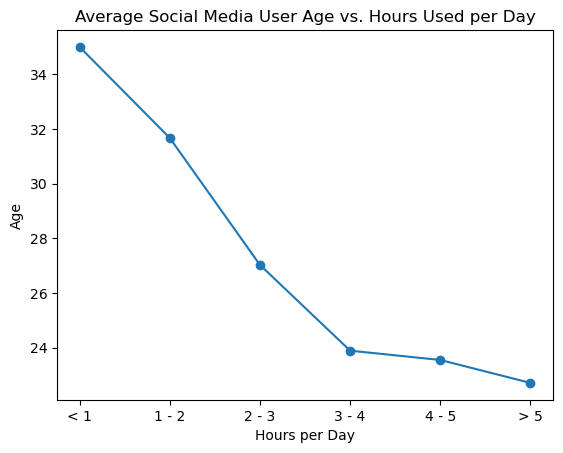

In [15]:
# Plot line graph depicting social media user age against hours of social media used per day
locs = range(0, len(age_time_avg))
labels = ["< 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5", "> 5"]

age_time_avg.plot(kind="line", x=age_time_avg.index, y=list(age_time_avg), marker="o", ylabel="Age", xlabel="Hours per Day",
                 title="Average Social Media User Age vs. Hours Used per Day")

plt.xticks(ticks=locs, labels=labels)

plt.savefig("../Data_output/avg_age_vs_hours_line_graph.png")
plt.show()

In [16]:
# Group by age groups and create a subgroup showing total users by hours per day
age_group_hours = survey_df.groupby(["Age groups", "Hours per day"]).size().unstack()

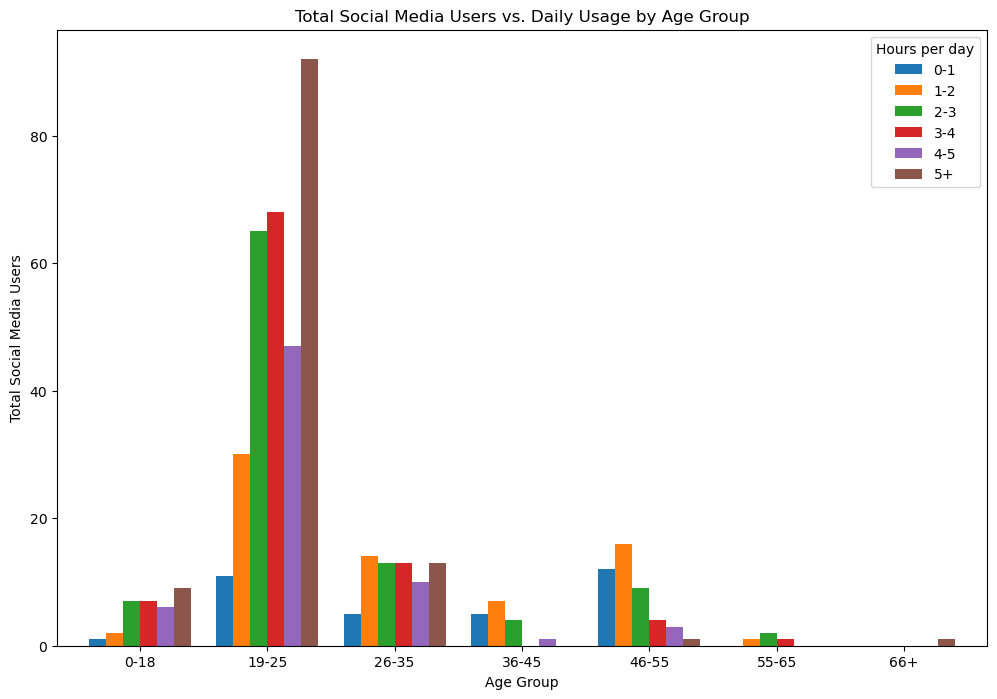

In [17]:
# Plot figure showing total number per usage per day broken down by age group
age_group_hours.plot(kind="bar", width=0.8, figsize=(12,8))

plt.title("Total Social Media Users vs. Daily Usage by Age Group")
plt.ylabel("Total Social Media Users")
plt.xlabel("Age Group")
plt.xticks(rotation=0)

plt.savefig("../Data_output/hours_by_agegroup_bar_graph.png")
plt.show()

## Age vs. Mental Health Score

In [18]:
# Define a regression function
def regression(x, y, graph_x, graph_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    return plt.plot(x, regress_values, "r-"), print(f"The r-squared is: {rvalue**2}"), plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(graph_x, graph_y), color="red", size=15)

The r-squared is: 0.09007789788822729


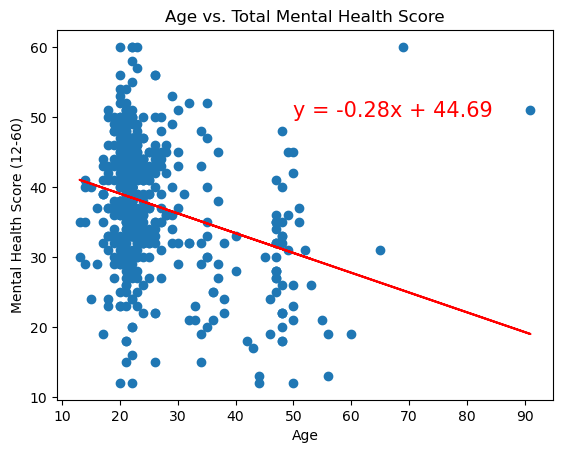

In [19]:
# Plot age against mental health score and determie correlation coefficient
plt.scatter(x=survey_df["Age"], y=survey_df["Total score"])
plt.xlabel("Age")
plt.ylabel("Mental Health Score (12-60)")
plt.title("Age vs. Total Mental Health Score")
regression(survey_df["Age"], survey_df["Total score"], 50, 50)

plt.savefig("../Data_output/age_vs_mhs_line_graph.png")
plt.show()

In [20]:
# Split dataframe to show only users with 0-4 hours of social media use per day
low_users_df = survey_df.loc[(survey_df["Hours per day"] == "0-1") | (survey_df["Hours per day"] == "1-2") | 
                             (survey_df["Hours per day"] == "2-3") | (survey_df["Hours per day"] == "3-4")]

low_users_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,Restless w/o social media,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score,Social media score,General indicators score,Age groups
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,2,5,2,5,2,3,2,5,4,5,43,17,26,19-25
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,1,2,5,4,3,3,1,4,2,5,35,13,22,19-25
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2-3,3,5,4,4,5,5,3,3,3,4,4,1,44,21,23,19-25
5,22.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,4,4,2,3,4,3,4,4,3,3,2,4,40,21,19,19-25
6,21.0,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",3-4,4,3,2,2,4,3,5,3,4,5,5,3,43,21,22,19-25


The r-squared is: 0.12430237063293904


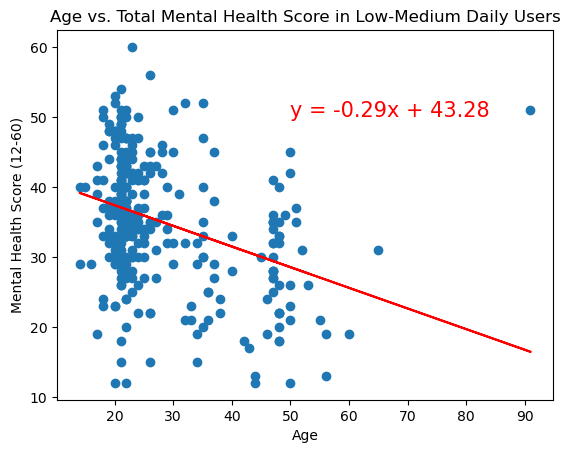

In [21]:
# Plot Age of low-medium daily users against mental health score to determine if there is any correlation
plt.scatter(x=low_users_df["Age"], y=low_users_df["Total score"])
plt.xlabel("Age")
plt.ylabel("Mental Health Score (12-60)")
plt.title("Age vs. Total Mental Health Score in Low-Medium Daily Users")
regression(low_users_df["Age"], low_users_df["Total score"], 50, 50)

plt.savefig("../Data_output/age_vs_mhs_lowuser_scatter.png")
plt.show()

In [22]:
# Split dataframe to show only users with 4-5+ hours of social media use per day
high_users_df = survey_df.loc[(survey_df["Hours per day"] == "4-5") | (survey_df["Hours per day"] == "5+")]

high_users_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,Restless w/o social media,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score,Social media score,General indicators score,Age groups
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,2,4,5,4,5,1,1,5,4,5,43,16,27,19-25
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5+,4,2,1,3,5,3,5,1,2,4,3,2,35,15,20,19-25
7,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",5+,5,2,3,3,3,1,1,3,1,5,5,1,33,15,18,19-25
8,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",5+,5,2,3,3,1,1,1,3,1,5,5,1,31,15,16,19-25
14,22.0,Male,Single,University Student,University,Yes,"Facebook, YouTube, Pinterest",5+,5,5,5,5,5,5,5,5,5,5,5,5,60,30,30,19-25


The r-squared is: 0.016938945021376477


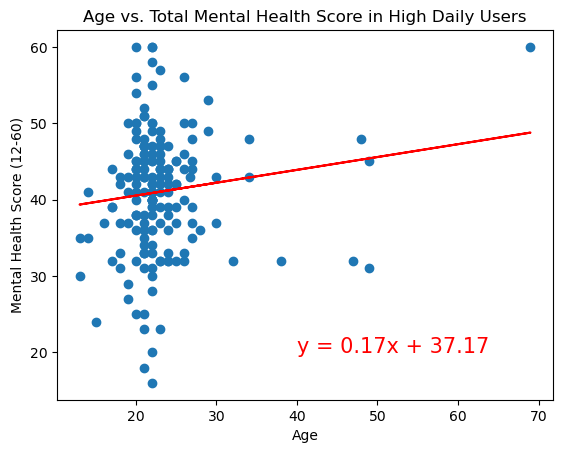

In [23]:
# Plot Age of high daily users against mental health score to determine if there is any correlation
plt.scatter(x=high_users_df["Age"], y=high_users_df["Total score"])
plt.xlabel("Age")
plt.ylabel("Mental Health Score (12-60)")
plt.title("Age vs. Total Mental Health Score in High Daily Users")
regression(high_users_df["Age"], high_users_df["Total score"], 40, 20)

plt.savefig("../Data_output/age_vs_mhs_highuser_scatter.png")
plt.show()

## Social Media Hours Used vs. Mental Health Score

### Overall Scatterplot - Social Media scores vs. General Mental Health Indicators scores

The r-squared is: 0.4088298225183001


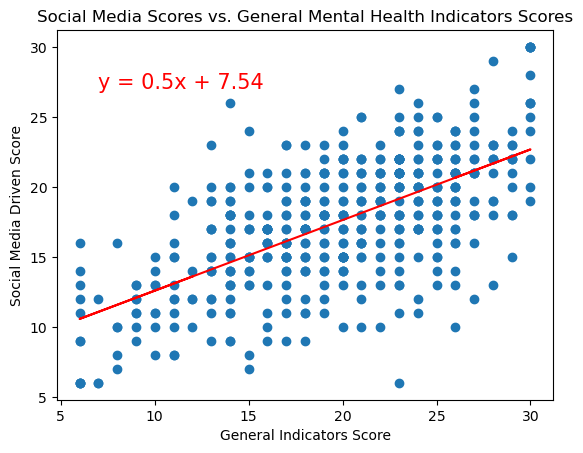

In [24]:
# Plot scores related to general indicators of mental health against scores related to social media usage to determine if there is any correlation
x_values = survey_df["Total score"] - survey_df["Social media score"]
y_values = survey_df["Social media score"]

plt.scatter(x=x_values, y=y_values)
plt.xlabel("General Indicators Score")
plt.ylabel("Social Media Driven Score")
plt.title("Social Media Scores vs. General Mental Health Indicators Scores")
regression(x_values, y_values, 7, 27)

plt.savefig("../Data_output/smscore_vs_giscore_scatter.png")
plt.show()

### Overall Boxplot - Hours Used vs. Score

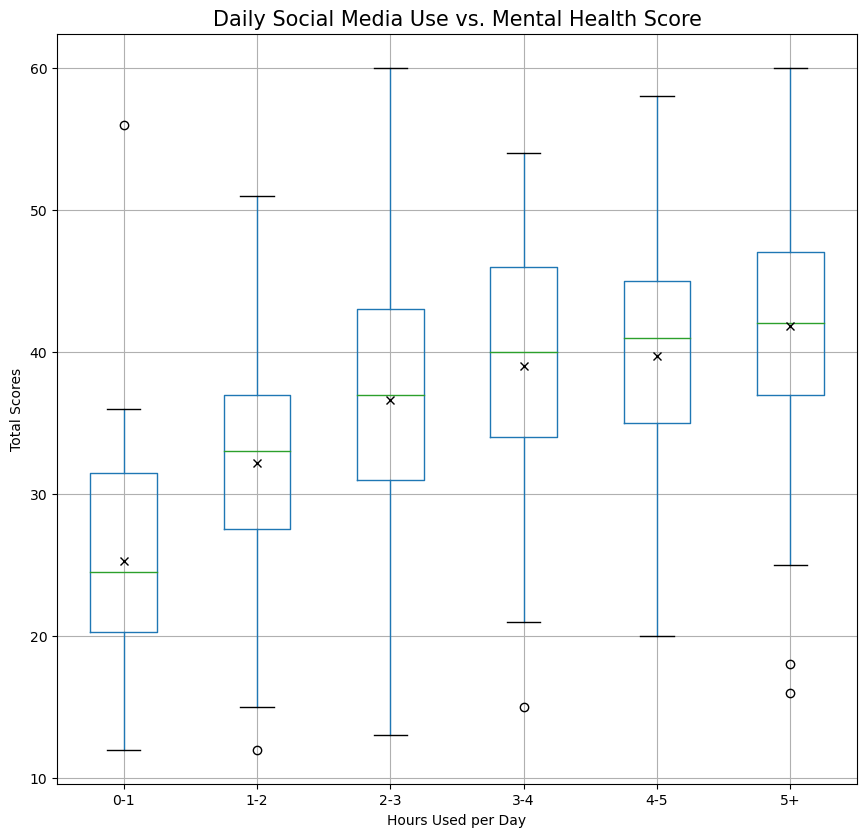

In [25]:
# Create a boxplot of hours social media used vs. total mental health score
fig = survey_df.boxplot("Total score", by="Hours per day", figsize=(10,10), showmeans=True,
                  meanprops={"marker":"x", "markeredgecolor":"black"})

fig.get_figure().suptitle("")
fig.set_title("Daily Social Media Use vs. Mental Health Score", size=15)
fig.set_xlabel("Hours Used per Day")
fig.set_ylabel("Total Scores")

plt.savefig("../Data_output/hours_used_vs_mhs_boxplot.png")
plt.show()

### Overall ANOVA - Hours Used vs. Score 

In [26]:
# Perform ANOVA test for hourly usage groups comparing total mental health score
g0_1 = survey_df[survey_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = survey_df[survey_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = survey_df[survey_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = survey_df[survey_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = survey_df[survey_df["Hours per day"] == "4-5"]["Total score"]
g5_up = survey_df[survey_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=29.14535954167053, pvalue=8.109114754909043e-26)

### Overall Independent t-test - Hours Used vs. Score

In [27]:
# Independent t-test of mental health scores of 0-4 hours daily social media users vs 4+ daily hours users
stats.ttest_ind(low_users_df["Total score"], high_users_df["Total score"], equal_var=False)

TtestResult(statistic=-7.538730891835496, pvalue=2.805214865924709e-13, df=433.1436944835482)

In [28]:
# Obtain averegae mental health scores grouped by age group and hours social media used
scores_age_group = survey_df.groupby(["Hours per day", "Age groups"])["Total score"].mean().unstack()

scores_age_group

Age groups,0-18,19-25,26-35,36-45,46-55,55-65,66+
Hours per day,,,,,,,
0-1,19.000000,26.090909,30.400000,17.000000,26.416667,NaN,NaN
1-2,32.000000,35.900000,29.285714,31.571429,28.812500,19.0,NaN
2-3,35.857143,38.338462,37.846154,25.250000,30.777778,16.0,NaN
3-4,40.857143,39.073529,39.538462,NaN,34.250000,31.0,NaN
4-5,32.833333,40.936170,39.800000,32.000000,36.000000,NaN,NaN
5+,38.333333,41.456522,45.000000,NaN,48.000000,NaN,60.0


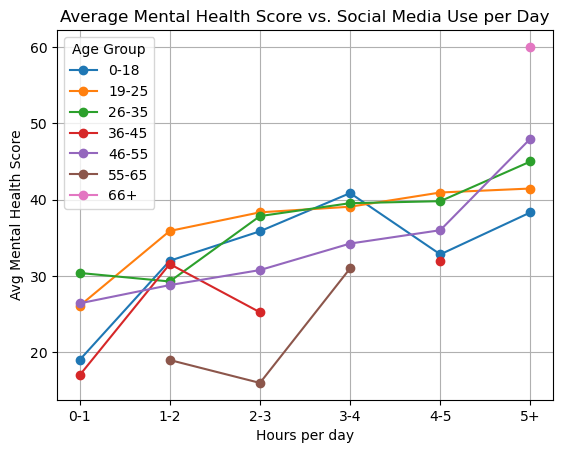

In [29]:
# Create a line graph depicting hours social media used per day vs Avg mental health score by age group
scores_age_group.plot(kind="line", marker="o", ylabel="Avg Mental Health Score",
                      title="Average Mental Health Score vs. Social Media Use per Day").legend(title="Age Group", loc="best")
plt.grid()
plt.savefig("../Data_output/avg_mhs_vs_hours_used_by_age_multiline_graph.png")
plt.show()

### <18 Age Group Boxplot - Hours Used vs. Score

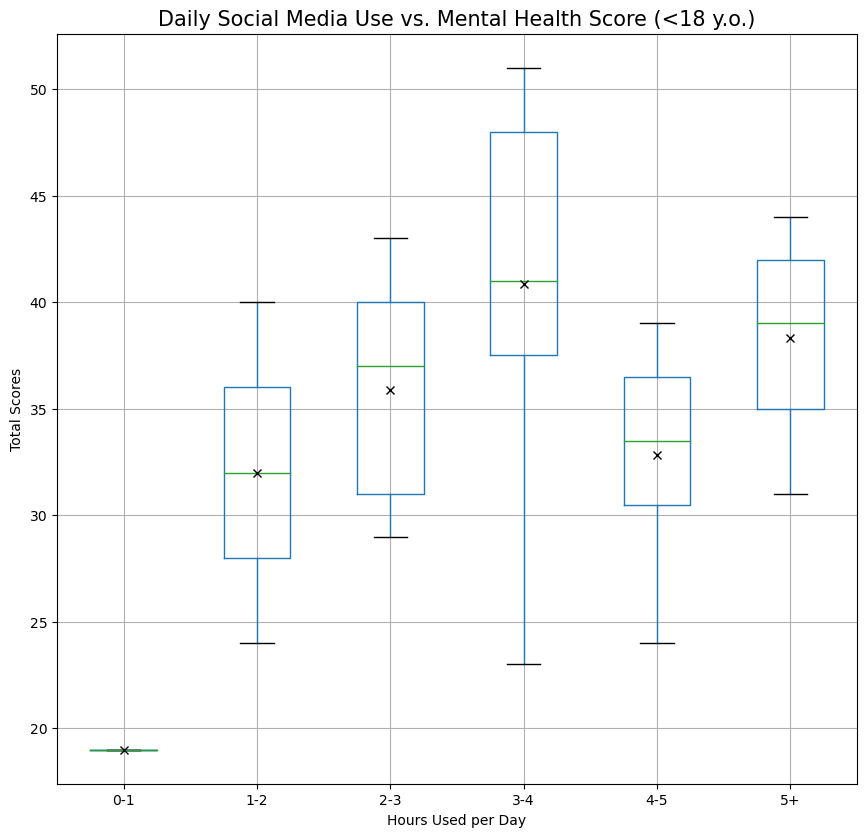

In [30]:
# Create a boxplot of hours social media used vs. total mental health score for ages < 18
less18_df = survey_df.loc[survey_df["Age groups"] == "0-18"]

fig1 = less18_df.boxplot("Total score", by="Hours per day", figsize=(10,10), showmeans=True,
                  meanprops={"marker":"x", "markeredgecolor":"black"})

fig1.get_figure().suptitle("")
fig1.set_title("Daily Social Media Use vs. Mental Health Score (<18 y.o.)", size=15)
fig1.set_xlabel("Hours Used per Day")
fig1.set_ylabel("Total Scores")

plt.savefig("../Data_output/hours_used_vs_mhs_18_boxplot.png")
plt.show()

### <18 Age Group ANOVA - Hours Used vs. Score 

In [31]:
# Perform ANOVA test for hourly usage groups, of ages <18, comparing total mental health score
g0_1 = less18_df[less18_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = less18_df[less18_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = less18_df[less18_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = less18_df[less18_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = less18_df[less18_df["Hours per day"] == "4-5"]["Total score"]
g5_up = less18_df[less18_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=2.5613142732690517, pvalue=0.051761765743704016)

### 19-25 Age Group Boxplot - Hours Used vs. Score

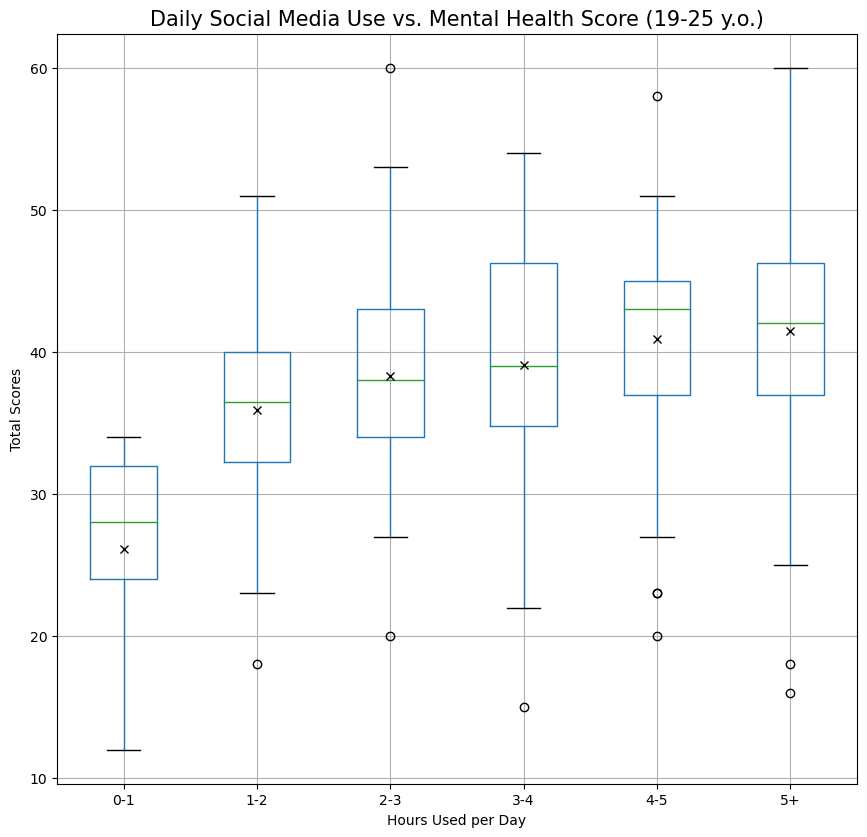

In [32]:
# Create a boxplot of hours social media used vs. total mental health score for ages 19-25
lowtwenties_df = survey_df.loc[survey_df["Age groups"] == "19-25"]

fig2 = lowtwenties_df.boxplot("Total score", by="Hours per day", figsize=(10,10), showmeans=True,
                  meanprops={"marker":"x", "markeredgecolor":"black"})

fig2.get_figure().suptitle("")
fig2.set_title("Daily Social Media Use vs. Mental Health Score (19-25 y.o.)", size=15)
fig2.set_xlabel("Hours Used per Day")
fig2.set_ylabel("Total Scores")

plt.savefig("../Data_output/hours_used_vs_mhs_19-25_boxplot.png")
plt.show()

### 19-25 Age Group ANOVA - Hours Used vs. Score 

In [33]:
# Perform ANOVA test for hourly usage groups, of ages 19-25, comparing total mental health score
g0_1 = lowtwenties_df[lowtwenties_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = lowtwenties_df[lowtwenties_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = lowtwenties_df[lowtwenties_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = lowtwenties_df[lowtwenties_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = lowtwenties_df[lowtwenties_df["Hours per day"] == "4-5"]["Total score"]
g5_up = lowtwenties_df[lowtwenties_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=9.400670182859933, pvalue=2.3759313125091938e-08)

### 26-35 Age Group Boxplot - Hours Used vs. Score

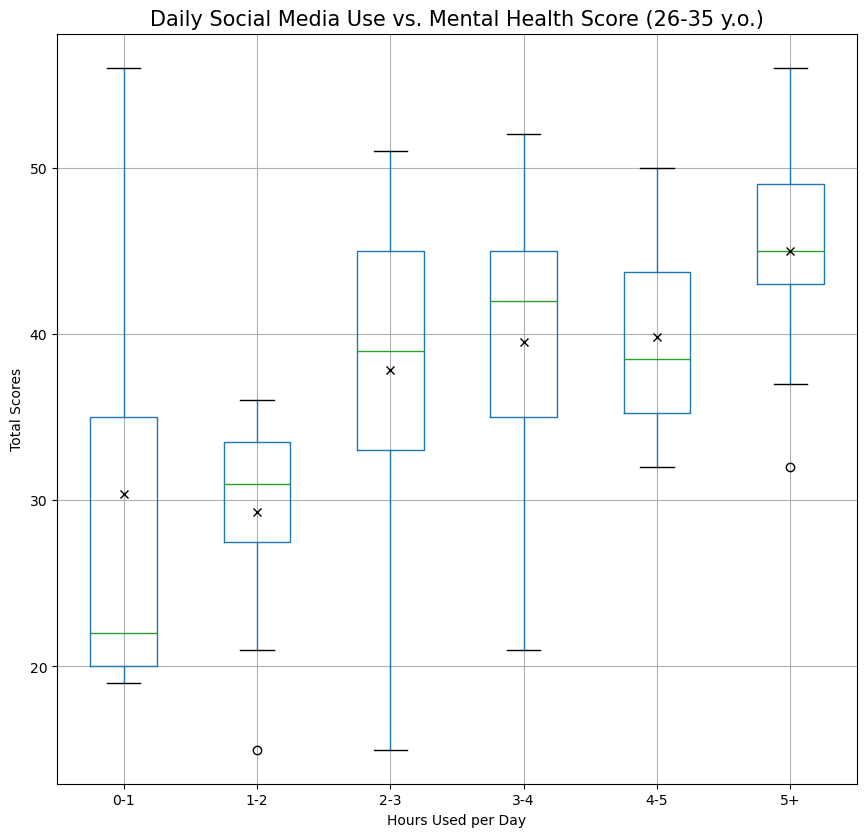

In [34]:
# Create a boxplot of hours social media used vs. total mental health score for ages 26-35
thirties_df = survey_df.loc[survey_df["Age groups"] == "26-35"]

fig3 = thirties_df.boxplot("Total score", by="Hours per day", figsize=(10,10), showmeans=True,
                  meanprops={"marker":"x", "markeredgecolor":"black"})

fig3.get_figure().suptitle("")
fig3.set_title("Daily Social Media Use vs. Mental Health Score (26-35 y.o.)", size=15)
fig3.set_xlabel("Hours Used per Day")
fig3.set_ylabel("Total Scores")

plt.savefig("../Data_output/hours_used_vs_mhs_26-35_boxplot.png")
plt.show()

### 26-35 Age Group ANOVA - Hours Used vs. Score 

In [35]:
# # Perform ANOVA test for hourly usage groups, of ages 26-35, comparing total mental health score
g0_1 = thirties_df[thirties_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = thirties_df[thirties_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = thirties_df[thirties_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = thirties_df[thirties_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = thirties_df[thirties_df["Hours per day"] == "4-5"]["Total score"]
g5_up = thirties_df[thirties_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=5.534461139403367, pvalue=0.0002816233170514804)

### 46-55 Age Group Boxplot - Hours Used vs. Score

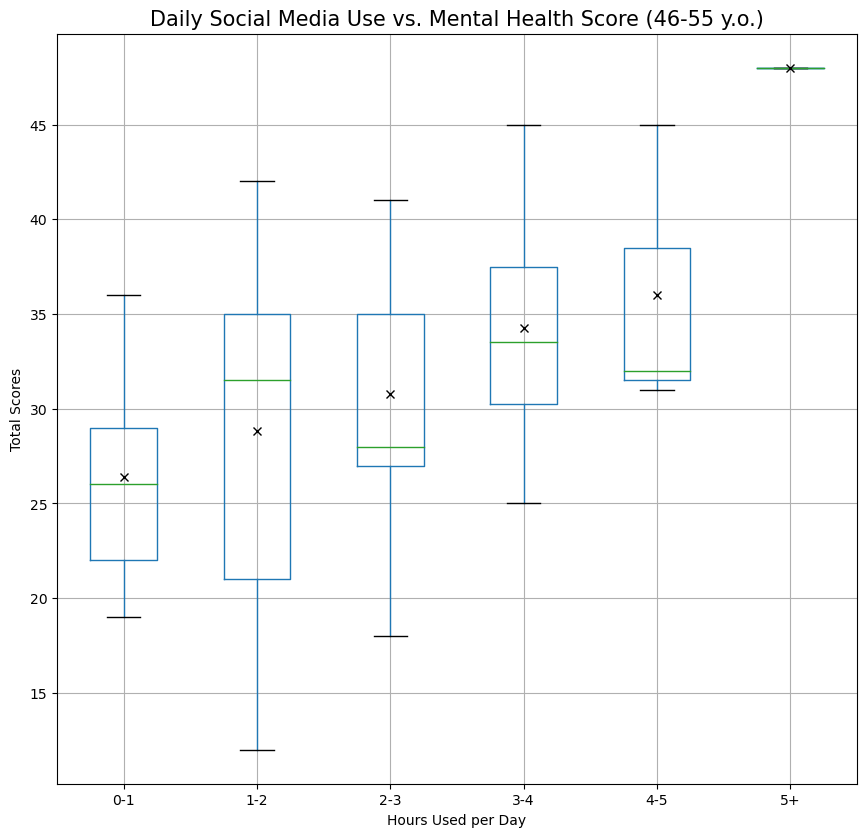

In [36]:
# Create a boxplot of hours social media used vs. total mental health score for ages 46-55
above40_df = survey_df.loc[survey_df["Age groups"] == "46-55"]

fig4 = above40_df.boxplot("Total score", by="Hours per day", figsize=(10,10), showmeans=True,
                  meanprops={"marker":"x", "markeredgecolor":"black"})

fig4.get_figure().suptitle("")
fig4.set_title("Daily Social Media Use vs. Mental Health Score (46-55 y.o.)", size=15)
fig4.set_xlabel("Hours Used per Day")
fig4.set_ylabel("Total Scores")

plt.savefig("../Data_output/hours_used_vs_mhs_46-55_boxplot.png")
plt.show()

### 46-55 Age Group ANOVA - Hours Used vs. Score 

In [37]:
# Perform ANOVA test for hourly usage groups, of ages 46-55, comparing total mental health score
g0_1 = above40_df[above40_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = above40_df[above40_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = above40_df[above40_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = above40_df[above40_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = above40_df[above40_df["Hours per day"] == "4-5"]["Total score"]
g5_up = above40_df[above40_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=2.5181644914160635, pvalue=0.045473711051482735)